# Baseline Logistic Regression Model

**Gathering Data**

In [10]:
# Add all imports related to data engineering
import json
import numpy as np
import pandas as pd
import string

In [11]:
# Import the training json file, then close the file
file = open("raw_data/train.json")
raw_data = json.load(file)
file.close()

In [12]:
pii_number_encoding = {
    'B-EMAIL': 0, 
    'B-ID_NUM': 1, 
    'B-NAME_STUDENT': 2, 
    'B-PHONE_NUM': 3, 
    'B-STREET_ADDRESS': 4, 
    'B-URL_PERSONAL': 5, 
    'B-USERNAME': 6, 
    'I-NAME_STUDENT': 7,  
    'I-PHONE_NUM': 8, 
    'I-STREET_ADDRESS': 9,  
    'I-URL_PERSONAL': 10, 
    'O': 11
}

In [13]:
# Got the txt file from here: https://gist.github.com/deekayen/4148741

# Common words List to hold common words
with open("ml-data-input/most-common-words.txt", "r") as common_words_file:
    common_tokens = [word[:-1] for word in list(common_words_file)]
    common_tokens.append("\n\n")
    common_tokens.append("\n")

# Add punctuation to the list of commonalities
for char in list(string.punctuation):
    common_tokens.append(char)

print(common_tokens)

['the', 'of', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'that', 'he', 'was', 'for', 'on', 'are', 'with', 'as', 'I', 'his', 'they', 'be', 'at', 'one', 'have', 'this', 'from', 'or', 'had', 'by', 'not', 'word', 'but', 'what', 'some', 'we', 'can', 'out', 'other', 'were', 'all', 'there', 'when', 'up', 'use', 'your', 'how', 'said', 'an', 'each', 'she', 'which', 'do', 'their', 'time', 'if', 'will', 'way', 'about', 'many', 'then', 'them', 'write', 'would', 'like', 'so', 'these', 'her', 'long', 'make', 'thing', 'see', 'him', 'two', 'has', 'look', 'more', 'day', 'could', 'go', 'come', 'did', 'number', 'sound', 'no', 'most', 'people', 'my', 'over', 'know', 'water', 'than', 'call', 'first', 'who', 'may', 'down', 'side', 'been', 'now', 'find', 'any', 'new', 'work', 'part', 'take', 'get', 'place', 'made', 'live', 'where', 'after', 'back', 'little', 'only', 'round', 'man', 'year', 'came', 'show', 'every', 'good', 'me', 'give', 'our', 'under', 'name', 'very', 'through', 'just', 'form', 'sentence', 'g

In [14]:
# A function to get rid of the 1000 most common used words
def common_word_drop(token_list, whitespace_list, label_list):
    for word in common_tokens:
        if word in token_list:
            indices = [i for i, x in enumerate(token_list) if x.lower() == word]
            token_list = [token_list[i] for i in range(len(token_list)) if i not in indices]
            whitespace_list = [whitespace_list[i] for i in range(len(whitespace_list)) if i not in indices]
            label_list = [label_list[i] for i in range(len(label_list)) if i not in indices]

    return token_list, whitespace_list, label_list

In [15]:
def engineer_data_for_model(data):

    # Get the first value from the data
    first_doc = data[0]

    # Get rid of common words
    # tokens, white_spaces, labels = common_word_drop(first_doc['tokens'], first_doc['trailing_whitespace'], first_doc['labels'])
    tokens, white_spaces, labels = first_doc['tokens'], first_doc['trailing_whitespace'], first_doc['labels']

    # Create the initial dataframe from the above data
    first_doc_data = {
        "tokens": tokens,
        "trailing_whitespaces": white_spaces,
        "capitalized first char": [True if label[0].isupper() else False for label in tokens],
        "token length": [len(token) for token in tokens],
        "is_numeric": [True if token.isnumeric() else False for token in tokens],
        "PII label": [pii_number_encoding[label] for label in labels]
    }
    raw_df = pd.DataFrame(first_doc_data)

    # Loop till the end of the data
    for document in data[1: len(data) - 1]:

        # Get rid of common words
        # tokens, white_spaces, labels = common_word_drop(document['tokens'], document['trailing_whitespace'], document['labels'])
        tokens, white_spaces, labels = document['tokens'], document['trailing_whitespace'], document['labels']

        # Collect the data in the same way
        doc_data = {
            "tokens": tokens,
            "trailing_whitespaces": white_spaces,
            "capitalized first char": [True if label[0].isupper() else False for label in tokens],
            "token length": [len(token) for token in tokens],
            "is_numeric": [True if token.isnumeric() else False for token in tokens],
            "PII label": [pii_number_encoding[label] for label in labels]
        }
        df = pd.DataFrame(doc_data)

        # Concatenate all the data into one single dataframe
        raw_df = pd.concat([raw_df, df], ignore_index=True, sort=False)

    # Return the concatenated dataframe
    return raw_df


In [16]:
# Get the training data and get rid of some unneeded number values
data = engineer_data_for_model(raw_data[0:20]).reset_index()

# Show the data
data

,index,tokens,trailing_whitespaces,capitalized first char,token length,is_numeric,PII label
0,0,Design,True,True,6,False,11
1,1,Thinking,True,True,8,False,11
2,2,for,True,False,3,False,11
3,3,innovation,True,False,10,False,11
4,4,reflexion,False,False,9,False,11
...,...,...,...,...,...,...,...
17021,17021,-,False,False,1,False,11
17022,17022,technicians,True,False,11,False,11
17023,17023,,False,False,1,False,11
17024,17024,---,False,False,3,False,11


In [17]:
# from sklearn.feature_extraction.text import HashingVectorizer
import pickle
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True, unicode_errors='ignore')

def get_token_vector(token):
  try:
    return word2vec_model[token]
  except KeyError:
    return np.zeros(word2vec_model.vector_size)


In [71]:
vectorized_data = pd.DataFrame({
  'vectors': data['tokens'].apply(lambda tokens: [get_token_vector(token) for token in tokens])
})

vectorized_data

,vectors
0,"[[-0.16601562, 0.1484375, 0.20214844, 0.041259..."
1,"[[-0.2421875, 0.14550781, 0.026855469, 0.00759..."
2,"[[-0.21679688, 0.13574219, 0.18652344, 0.11376..."
3,"[[-0.22558594, -0.01953125, 0.09082031, 0.2373..."
4,"[[-0.30078125, 0.18945312, -0.03491211, 0.125,..."
...,...
17021,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17022,"[[-0.33789062, 0.19824219, -0.296875, 0.148437..."
17023,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17024,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [73]:
def flatten_matrix(matrix):
    return np.ravel(matrix)

flattened_data = vectorized_data["vectors"].apply(flatten_matrix)

flattened_data

0        [-0.16601562, 0.1484375, 0.20214844, 0.0412597...
1        [-0.2421875, 0.14550781, 0.026855469, 0.007598...
2        [-0.21679688, 0.13574219, 0.18652344, 0.113769...
3        [-0.2255859375, -0.01953125, 0.0908203125, 0.2...
4        [-0.30078125, 0.18945312, -0.03491211, 0.125, ...
                               ...                        
17021    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17022    [-0.337890625, 0.1982421875, -0.296875, 0.1484...
17023    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17024    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17025    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vectors, Length: 17026, dtype: object

In [79]:
from itertools import zip_longest

max_len = max(flattened_data.apply(len))

padded_sequences = flattened_data.apply(lambda vectors: list(zip_longest(vectors, fillvalue=np.zeros_like(vectors[0]))))

vectorized_data_padded = pd.DataFrame(padded_sequences.tolist(), columns=[f'feature_{i}' for i in range(max_len)])

print(vectorized_data_padded)

              feature_0        feature_1        feature_2        feature_3  \
0        (-0.16601562,)     (0.1484375,)    (0.20214844,)   (0.041259766,)   
1         (-0.2421875,)    (0.14550781,)   (0.026855469,)   (0.007598877,)   
2        (-0.21679688,)    (0.13574219,)    (0.18652344,)    (0.11376953,)   
3      (-0.2255859375,)   (-0.01953125,)  (0.0908203125,)  (0.2373046875,)   
4        (-0.30078125,)    (0.18945312,)   (-0.03491211,)         (0.125,)   
...                 ...              ...              ...              ...   
17021            (0.0,)           (0.0,)           (0.0,)           (0.0,)   
17022   (-0.337890625,)  (0.1982421875,)     (-0.296875,)     (0.1484375,)   
17023            (0.0,)           (0.0,)           (0.0,)           (0.0,)   
17024            (0.0,)           (0.0,)           (0.0,)           (0.0,)   
17025            (0.0,)           (0.0,)           (0.0,)           (0.0,)   

              feature_4           feature_5              featur

In [ ]:
# Concatenate the flattened features with the labels
final_data = pd.concat([flattened_data, data['PII label']], axis=1)

In [ ]:
#import hashlib

#hashed_values = [hashlib.sha256(row.tobytes()).hexdigest() for row in encoded_tokens]

#hashed_integers = [int(hash_val, 16) for hash_val in hashed_values]

# data["hashed_tokens"] = hashed_integers

data

,index,tokens,trailing_whitespaces,capitalized first char,token length,is_numeric,PII label,hashed_tokens
0,0,Design,True,True,6,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,Thinking,True,True,8,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,for,True,False,3,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,innovation,True,False,10,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,reflexion,False,False,9,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
2061894,2061894,aids,True,False,4,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2061895,2061895,of,True,False,2,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2061896,2061896,representation,False,False,14,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2061897,2061897,.,False,False,1,False,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

**One-hot Encoding**

In [ ]:
# Train data
y_train = train_data["PII label"].to_numpy()
x_train = train_data.drop(columns=["tokens", "index", "PII label"])


# Test data
y_test = test_data["PII label"].to_numpy()
x_test = test_data.drop(columns=["tokens", "index", "PII label"])

In [ ]:
print(f"Length train_x = {len(x_train)} \n Length train_y = {len(y_train)}")

Length train_x = 1443329 
 Length train_y = 1443329


In [ ]:
print(f"Length test_x = {len(x_test)} \n Length test_y = {len(y_test)}")

Length test_x = 618570 
 Length test_y = 618570


In [ ]:
x_train

,trailing_whitespaces,capitalized first char,token length,is_numeric,hashed_tokens
854924,True,False,4,False,7663573213149377609760875632804907769681529599...
386934,True,False,4,False,1090633090969722883853177529824989588365404115...
1537990,True,False,11,False,3743831225947408568679618913417193657301221169...
774895,True,False,7,False,8154744108944860559061083236091324945857952371...
1963011,True,False,6,False,8154744108944860559061083236091324945857952371...
...,...,...,...,...,...
259178,True,False,2,False,1230984202092444316955163368580430032242820389...
1414414,True,False,1,False,4659560820920706982460261128727891657711320691...
131932,True,True,1,False,4659560820920706982460261128727891657711320691...
671155,True,False,3,False,3967424928050017799226036672855472442003107278...


In [ ]:
x_test

,trailing_whitespaces,capitalized first char,token length,is_numeric,hashed_tokens
75628,True,False,4,False,9202950153266640215738116784807663424119808013...
718395,True,True,5,False,1005458457661787206626556852191110660435006387...
1837346,True,False,4,False,6603633717779924889539878898394024345916822884...
529187,True,False,5,False,1002866935606643115650196879954364983619436657...
390269,True,False,8,False,9677690139337938245652627511251150900463771185...
...,...,...,...,...,...
1054897,True,False,7,False,1000114625554708472318131827529640177434711641...
1474643,True,False,4,False,6603633717779924889539878898394024345916822884...
258911,True,False,9,False,4547327983187146153549714311742776789688583819...
1073992,False,False,4,False,7663573213149377609760875632804907769681529599...


**Model**

In [ ]:
# import needed classes
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='sag', class_weight='balanced')

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

C:\Users\catherine\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    12,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [    18,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [   385,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     2,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [    35,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [   306,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     3,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     8,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [617800,      0,      0,      0,      0,      0,      0,      0,
             0,      0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

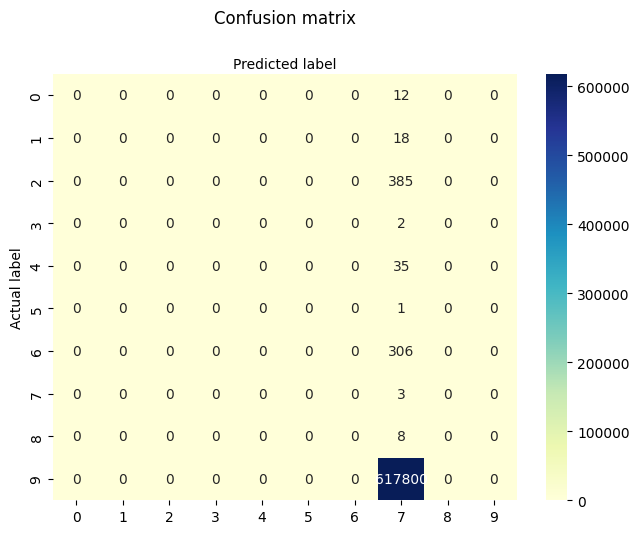

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9,10,11]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label')

In [ ]:
{
    'B-EMAIL': 0, 
    'B-ID_NUM': 1, 
    'B-NAME_STUDENT': 2, 
    'B-PHONE_NUM': 3, 
    'B-STREET_ADDRESS': 4, 
    'B-URL_PERSONAL': 5, 
    'B-USERNAME': 6, 
    'I-NAME_STUDENT': 7,  
    'I-PHONE_NUM': 8, 
    'I-STREET_ADDRESS': 9,  
    'I-URL_PERSONAL': 10, 
    'O': 11
}

{'B-EMAIL': 0,
 'B-ID_NUM': 1,
 'B-NAME_STUDENT': 2,
 'B-PHONE_NUM': 3,
 'B-STREET_ADDRESS': 4,
 'B-URL_PERSONAL': 5,
 'B-USERNAME': 6,
 'I-NAME_STUDENT': 7,
 'I-PHONE_NUM': 8,
 'I-STREET_ADDRESS': 9,
 'I-URL_PERSONAL': 10,
 'O': 11}

In [ ]:
target_names = list(pii_number_encoding.keys())

print(classification_report(y_test, y_pred))

C:\Users\catherine\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       385
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       306
           8       0.00      1.00      0.00         3
           9       0.00      0.00      0.00         8
          11       0.00      0.00      0.00    617800

    accuracy                           0.00    618570
   macro avg       0.00      0.10      0.00    618570
weighted avg       0.00      0.00      0.00    618570



C:\Users\catherine\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catherine\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
